In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Gradient Descent

In [ ]:
f = lambda x: x**2

In [ ]:
grad_f = lambda x: 2*x

In [ ]:
def gradient_descent(starting_point, learning_rate, num_iterations):
  x = starting_point
  history = [x]
  for _ in range(num_iterations):
    gradient = grad_f(x)
    x = x - learning_rate * gradient
    history.append(x)
  return x, history

Final x: 0.5368709120000001
Minimum value of f(x): 0.2882303761517119


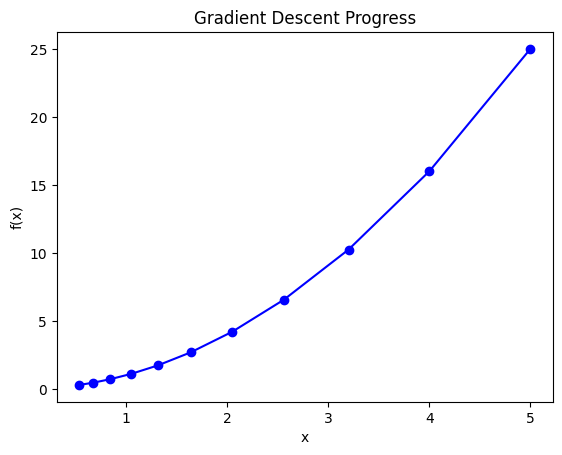

In [ ]:
#starting_point = 5.0
learning_rate = 0.1
num_iterations = 10

final_x, history = gradient_descent(starting_point, learning_rate, num_iterations)

print(f"Final x: {final_x}")
print(f"Minimum value of f(x): {f(final_x)}")

plt.plot(history, [f(x) for x in history], 'bo-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Progress')
plt.show()

# 2. GD with Momentum

In [ ]:
def gradient_descent_with_mom(starting_point, learning_rate, num_iterations, beta):
  x = starting_point
  history = [x]
  vel = 0.0
  for _ in range(num_iterations):
    gradient = grad_f(x)
    vel = beta * vel + learning_rate * gradient
    x = x - vel
    history.append(x)
  return x, history

Final x: -3.254545194645834e-15
Minimum value of f(x): 1.0592064423992289e-29


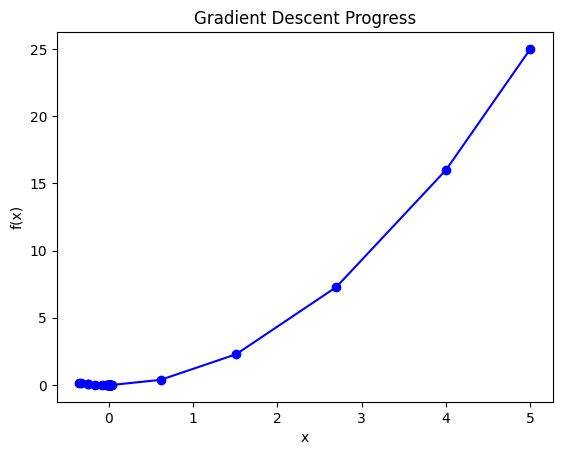

In [ ]:
starting_point = 5.0
learning_rate = 0.1
num_iterations = 100
beta = 0.5

final_x, history = gradient_descent_with_mom(starting_point, learning_rate, num_iterations, beta)

print(f"Final x: {final_x}")
print(f"Minimum value of f(x): {f(final_x)}")

plt.plot(history, [f(x) for x in history], 'bo-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Progress')
plt.show()

# 3. AdaGrad

In [ ]:
f = lambda x,y: x**2 + 10*y**2

In [ ]:
grad_f = lambda x,y: np.array([2*x, 20*y]) #partial derivates wrt x and y

In [ ]:
def adagrad(starting_point, learning_rate, num_iterations, epsilon=1e-8):
  theta = np.array(starting_point,dtype=float) #converting into numpy array
  G = np.zeros_like(theta) #Sum of squares gradients
  history = [theta.copy()]

  for _ in range(num_iterations):
    gradient = grad_f(*theta)
    G += gradient**2
    theta -= learning_rate * gradient / (np.sqrt(G+epsilon))
    history.append(theta.copy())

  return theta, history

In [ ]:
starting_point = (0.5,0.5)
learning_rate = 0.1
num_iterations = 100

final_theta, history = adagrad(starting_point, learning_rate, num_iterations)

print(f"Final theta: {final_theta}")
print(f"Minimum value of f(x): {f(*final_theta)}")

Final theta: [5.56054797e-06 5.56054774e-06]
Minimum value of f(x): 3.401166052023118e-10


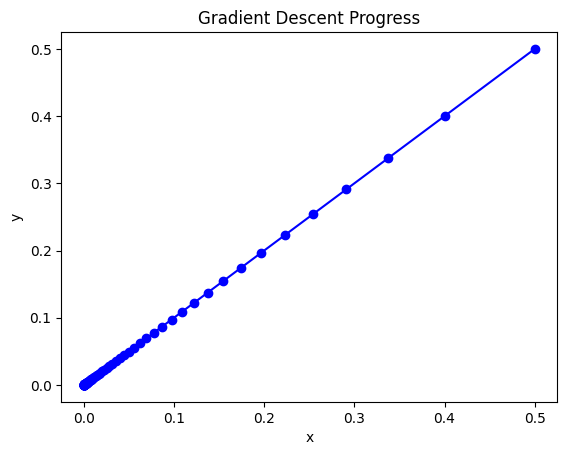

In [ ]:
history = np.array(history)
plt.plot(history[:,0], history[:,1], 'bo-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Progress')
plt.show()

# 4. RMSProp

In [12]:
def rmsprop(starting_point, learning_rate, num_iterations, gamma=0.9, epsilon=1e-8):
    theta = np.array(starting_point, dtype=float)
    Eg2 = np.zeros_like(theta)  # Moving average of squared gradients
    history = [theta.copy()]  # To track progress

    for _ in range(num_iterations):
        gradient = grad_f(*theta)
        Eg2 = gamma * Eg2 + (1 - gamma) * gradient**2
        adaptive_lr = learning_rate / (np.sqrt(Eg2) + epsilon)
        theta -= adaptive_lr * gradient
        history.append(theta.copy())

    return theta, history

In [13]:
starting_point = (0.5,0.5)
learning_rate = 0.1
num_iterations = 100

final_theta, history = rmsprop(starting_point, learning_rate, num_iterations)

print(f"Final theta: {final_theta}")
print(f"Minimum value of f(x): {f(*final_theta)}")

Final theta: [-0.06184623 -0.06184623]
Minimum value of f(x): 0.042074519302273995


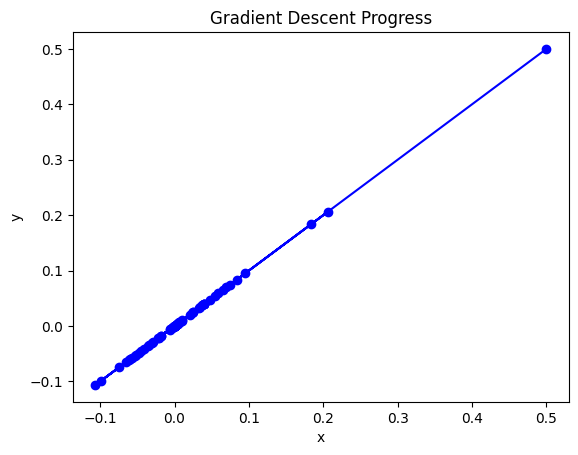

In [15]:
history = np.array(history)
plt.plot(history[:,0], history[:,1], 'bo-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Progress')
plt.show()

# 5. ADAM

In [17]:
def adam(starting_point, learning_rate, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    theta = np.array(starting_point, dtype=float)
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)
    history = [theta.copy()]

    for t in range(1, num_iterations + 1):
        gradient = grad_f(*theta)

        m = beta1 * m + (1 - beta1) * gradient

        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m / (1 - beta1 ** t)

        v_hat = v / (1 - beta2 ** t)

        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        history.append(theta.copy())

    return theta, history

In [18]:
starting_point = (0.5,0.5)
learning_rate = 0.1
num_iterations = 100

final_theta, history = rmsprop(starting_point, learning_rate, num_iterations)

print(f"Final theta: {final_theta}")
print(f"Minimum value of f(x): {f(*final_theta)}")

Final theta: [-0.06184623 -0.06184623]
Minimum value of f(x): 0.042074519302273995


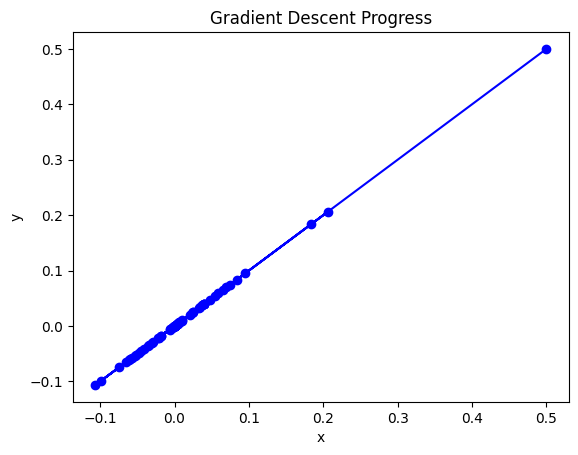

In [20]:
history = np.array(history)
plt.plot(history[:,0], history[:,1], 'bo-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Progress')
plt.show()